In [87]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [89]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [90]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [91]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [92]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [93]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [94]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=529819963c28d200151b4d0648f81ded


In [95]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | itarema
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | matcha
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | saleaula
City not found. Skipping...
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | fethiye
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | lagunas
Processing Record 20 of Set 1 | port hardy
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Se

City not found. Skipping...
Processing Record 38 of Set 4 | quatre cocos
Processing Record 39 of Set 4 | acajutla
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | porto santo
Processing Record 42 of Set 4 | marsa matruh
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | chara
Processing Record 45 of Set 4 | morehead
Processing Record 46 of Set 4 | lensk
Processing Record 47 of Set 4 | ayautla
City not found. Skipping...
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | falealupo
City not found. Skipping...
Processing Record 2 of Set 5 | tonaya
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | bubaque
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | sinjah
City not found. Skipping...
Processing Record 8

Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | dubbo
Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | spornoye
Processing Record 31 of Set 8 | christchurch
Processing Record 32 of Set 8 | miranda
Processing Record 33 of Set 8 | rassvet
Processing Record 34 of Set 8 | corinto
Processing Record 35 of Set 8 | terra nova
Processing Record 36 of Set 8 | fare
Processing Record 37 of Set 8 | blythe
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | chimbote
Processing Record 40 of Set 8 | gavle
Processing Record 41 of Set 8 | nortelandia
Processing Record 42 of Set 8 | skelleftea
Processing Record 43 of Set 8 | terrak
Processing Record 44 of Set 8 | avera
Processing Record 45 of Set 8 | guangyuan
Processing Record 46 of Set 8 | normandin
Processing Record 47 of Set 8 | karpathos
Processing Record 48 of Set 8 | calabozo
Processing Record 49 of Set 8 | ambon
Processing Record 50 of

Processing Record 20 of Set 12 | bend
Processing Record 21 of Set 12 | soe
Processing Record 22 of Set 12 | esperance
Processing Record 23 of Set 12 | mitchell
Processing Record 24 of Set 12 | aguimes
Processing Record 25 of Set 12 | mezen
Processing Record 26 of Set 12 | isla mujeres
Processing Record 27 of Set 12 | yamoussoukro
Processing Record 28 of Set 12 | progreso
Processing Record 29 of Set 12 | vao
Processing Record 30 of Set 12 | nordborg
Processing Record 31 of Set 12 | maloy
Processing Record 32 of Set 12 | zemio
Processing Record 33 of Set 12 | mandapam
Processing Record 34 of Set 12 | merauke
Processing Record 35 of Set 12 | mackay
Processing Record 36 of Set 12 | sorvag
City not found. Skipping...
Processing Record 37 of Set 12 | yar-sale
Processing Record 38 of Set 12 | wisconsin rapids
Processing Record 39 of Set 12 | lazaro cardenas
Processing Record 40 of Set 12 | soja
Processing Record 41 of Set 12 | yopal
Processing Record 42 of Set 12 | quelimane
Processing Record

In [96]:
len(city_data)

562

In [97]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,30.36,80,90,16.11,CA,2021-05-25 21:21:46
1,Bluff,-46.6000,168.3333,39.78,67,50,7.05,NZ,2021-05-25 21:21:27
2,Punta Arenas,-53.1500,-70.9167,35.71,80,20,15.37,CL,2021-05-25 21:21:28
3,Yellowknife,62.4560,-114.3525,45.28,46,20,1.01,CA,2021-05-25 21:21:29
4,Rikitea,-23.1203,-134.9692,76.55,80,58,9.91,PF,2021-05-25 21:21:27
5,Ilulissat,69.2167,-51.1000,35.62,64,15,6.91,GL,2021-05-25 21:22:11
6,Busselton,-33.6500,115.3333,45.05,76,100,8.63,AU,2021-05-25 21:21:29
7,Nikolskoye,59.7035,30.7861,48.09,76,100,5.79,RU,2021-05-25 21:18:19
8,Itarema,-2.9248,-39.9167,79.16,75,50,13.06,BR,2021-05-25 21:25:18
9,Hilo,19.7297,-155.0900,81.81,79,75,11.50,US,2021-05-25 21:17:07


In [98]:
# Reorder the columns
city_data_new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-05-25 21:21:46,55.7435,-97.8558,30.36,80,90,16.11
1,Bluff,NZ,2021-05-25 21:21:27,-46.6000,168.3333,39.78,67,50,7.05
2,Punta Arenas,CL,2021-05-25 21:21:28,-53.1500,-70.9167,35.71,80,20,15.37
3,Yellowknife,CA,2021-05-25 21:21:29,62.4560,-114.3525,45.28,46,20,1.01
4,Rikitea,PF,2021-05-25 21:21:27,-23.1203,-134.9692,76.55,80,58,9.91
5,Ilulissat,GL,2021-05-25 21:22:11,69.2167,-51.1000,35.62,64,15,6.91
6,Busselton,AU,2021-05-25 21:21:29,-33.6500,115.3333,45.05,76,100,8.63
7,Nikolskoye,RU,2021-05-25 21:18:19,59.7035,30.7861,48.09,76,100,5.79
8,Itarema,BR,2021-05-25 21:25:18,-2.9248,-39.9167,79.16,75,50,13.06
9,Hilo,US,2021-05-25 21:17:07,19.7297,-155.0900,81.81,79,75,11.50


In [99]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [100]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

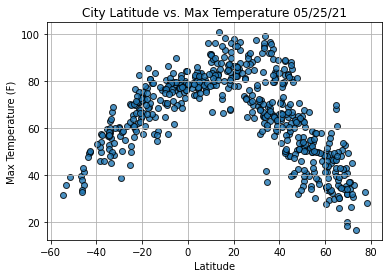

In [101]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

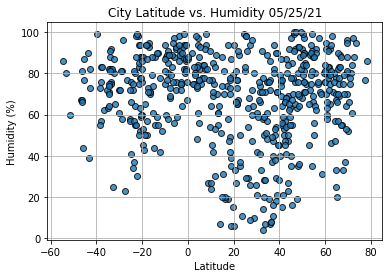

In [102]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

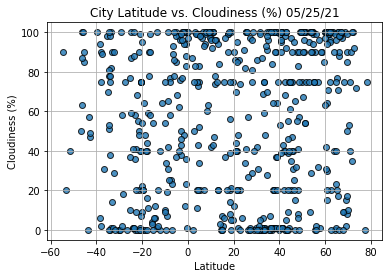

In [103]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

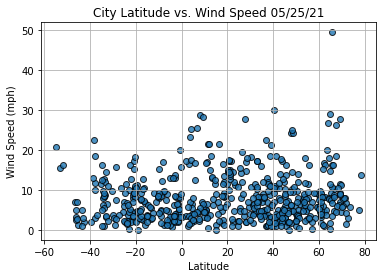

In [104]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [172]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [173]:
index13 = city_data_df.loc[13]
index13

City                         Lata
Country                        PT
Date          2021-05-25 21:24:13
Lat                       40.1629
Lng                       -8.3327
Max Temp                    64.72
Humidity                       79
Cloudiness                     99
Wind Speed                   1.07
Name: 13, dtype: object

In [174]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-05-25 21:21:46,55.7435,-97.8558,30.36,80,90,16.11
3,Yellowknife,CA,2021-05-25 21:21:29,62.4560,-114.3525,45.28,46,20,1.01
5,Ilulissat,GL,2021-05-25 21:22:11,69.2167,-51.1000,35.62,64,15,6.91
7,Nikolskoye,RU,2021-05-25 21:18:19,59.7035,30.7861,48.09,76,100,5.79
9,Hilo,US,2021-05-25 21:17:07,19.7297,-155.0900,81.81,79,75,11.50


In [175]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

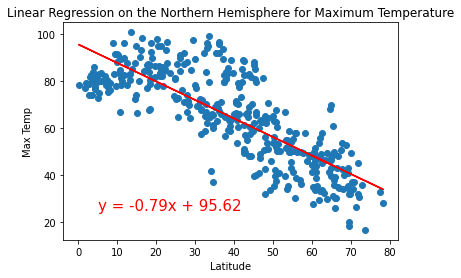

In [185]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,25))

In [186]:
linregress(x_values, y_values)

LinregressResult(slope=-0.7870681088431236, intercept=95.61539721291084, rvalue=-0.7969613776441375, pvalue=5.388796915877455e-85, stderr=0.030641790287463902)

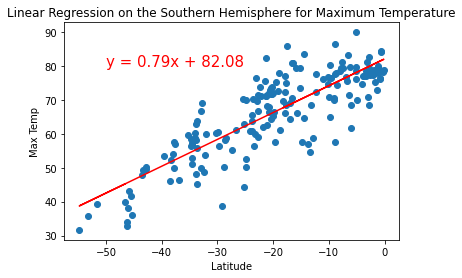

In [187]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

In [188]:
linregress(x_values, y_values)

LinregressResult(slope=0.7910669458763917, intercept=82.07784236528468, rvalue=0.8388515218982525, pvalue=3.748773761897452e-49, stderr=0.03836966981016495)

In [189]:
linregress(x_values, y_values).rvalue

0.8388515218982525

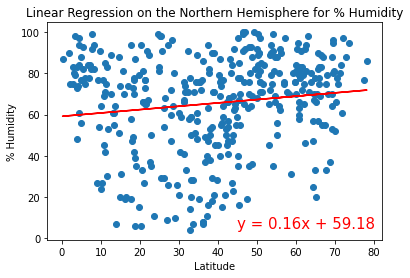

In [191]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Humidity', '% Humidity',(45,5))

In [192]:
linregress(x_values, y_values).rvalue

0.13645577107806767

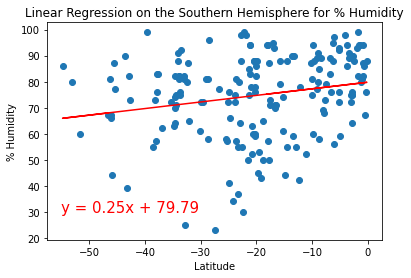

In [200]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-55,30))

In [201]:
linregress(x_values, y_values).rvalue

0.21014467095031536

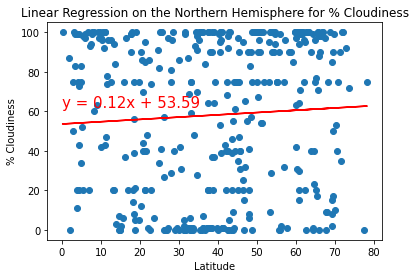

In [210]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(0,62))

In [211]:
linregress(x_values, y_values).rvalue

0.05925777080007998

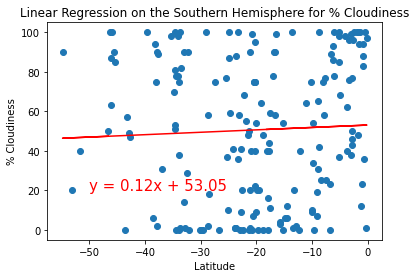

In [214]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-50,20))

In [215]:
linregress(x_values, y_values).rvalue

0.0448660724690325

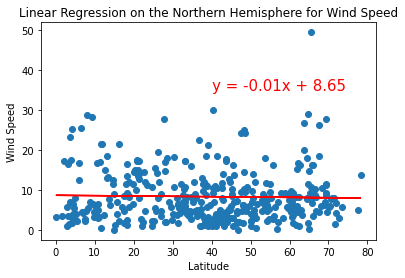

In [217]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Wind Speed', 'Wind Speed',(40,35))

In [218]:
linregress(x_values, y_values).rvalue

-0.02652008153164239

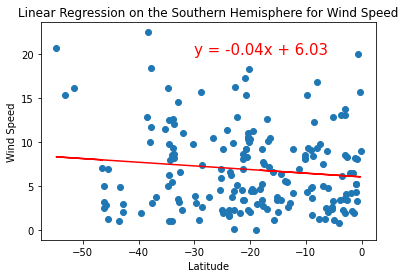

In [221]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Wind Speed', 'Wind Speed',(-30,20))

In [222]:
linregress(x_values, y_values).rvalue

-0.11809250082341055